In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are 7 numeric variables and 5 categorical variables. Dependent variable survived.

In [7]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


Categorical variable analysis

In [8]:
def category(variable):
    print(train_df[variable].value_counts())
    
    sns.countplot(train_df[variable])
    plt.show()

In [9]:
category_list = ["Survived", "Pclass", "Sex", "SibSp", "Parch", "Embarked", "Cabin"]

0    549
1    342
Name: Survived, dtype: int64


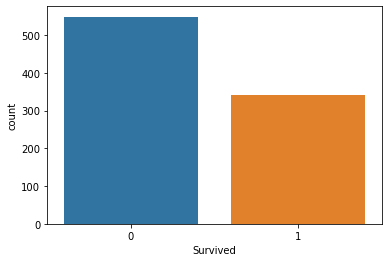

3    491
1    216
2    184
Name: Pclass, dtype: int64


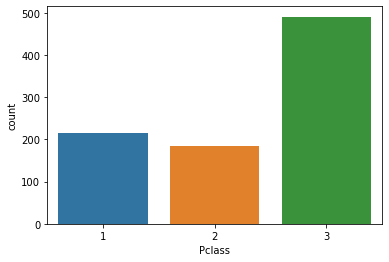

male      577
female    314
Name: Sex, dtype: int64


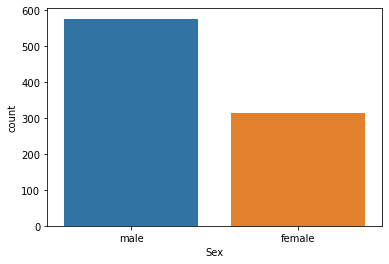

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


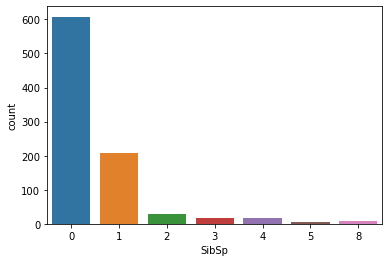

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


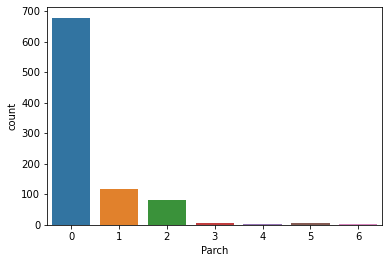

S    644
C    168
Q     77
Name: Embarked, dtype: int64


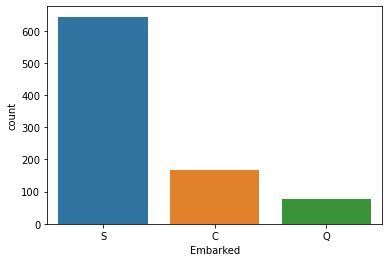

C23 C25 C27    4
B96 B98        4
G6             4
F2             3
E101           3
              ..
E50            1
C7             1
B38            1
C47            1
A36            1
Name: Cabin, Length: 147, dtype: int64


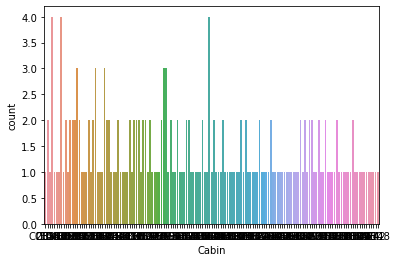

In [10]:
for i in category_list:
    category(i)

Here I wrote a function to visualize data and created a list, then I scrolled through the list I created in the for loop and visualized the variables with the loop.

Let's examine our continuous variables now.

In [11]:
def numeric(variable):
    
    plt.hist(train_df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} variable distribution".format(variable))
    plt.show()

In [12]:
numeric_list = ["Age", "Fare"]

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


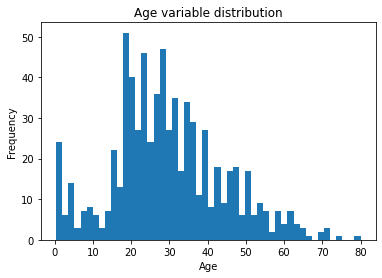

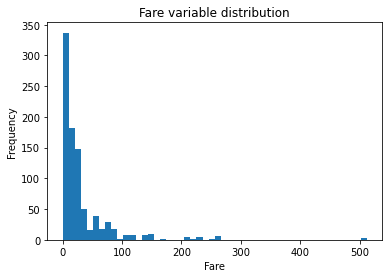

In [13]:
for i in numeric_list:
    numeric(i)

Relationship between independent variables and dependent variables

In [14]:
train_df.groupby("Sex")["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

74 percent of women survived. We can think of an idea that women were given priority in the rescue efforts.

In [15]:
train_df.groupby("Pclass")["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [16]:
train_df[(train_df["Sex"] == "female") & (train_df["Pclass"] == 1)]["Survived"].mean()

0.9680851063829787

96 percent of women with 1st class tickets survived.

In [17]:
train_df[(train_df["Sex"] == "male") & (train_df["Pclass"] == 1)]["Survived"].mean()

0.36885245901639346

36 percent of male passengers with 1st class tickets survived, This is rate lower than women.

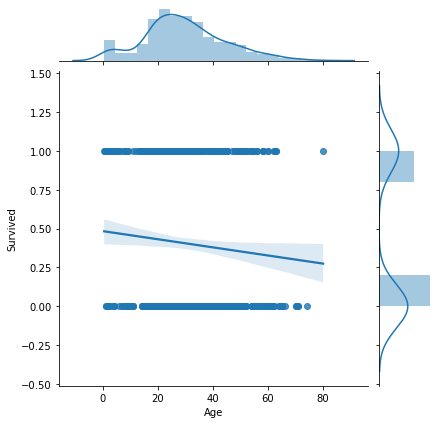

In [18]:
sns.jointplot("Age", "Survived", data = train_df, kind = "reg")

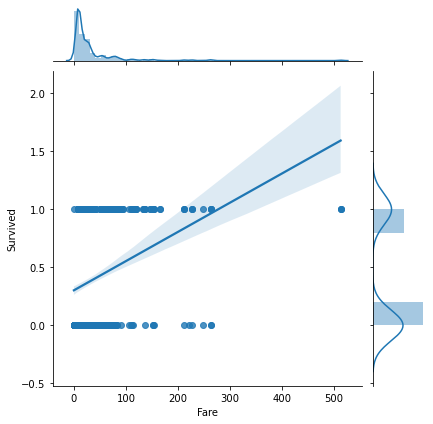

In [19]:
sns.jointplot("Fare", "Survived", data = train_df, kind = "reg")

The higher the fare, the higher the survival.

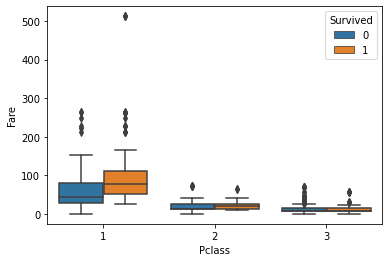

In [20]:
sns.boxplot(x = "Pclass", y = "Fare", data = train_df, hue = "Survived")

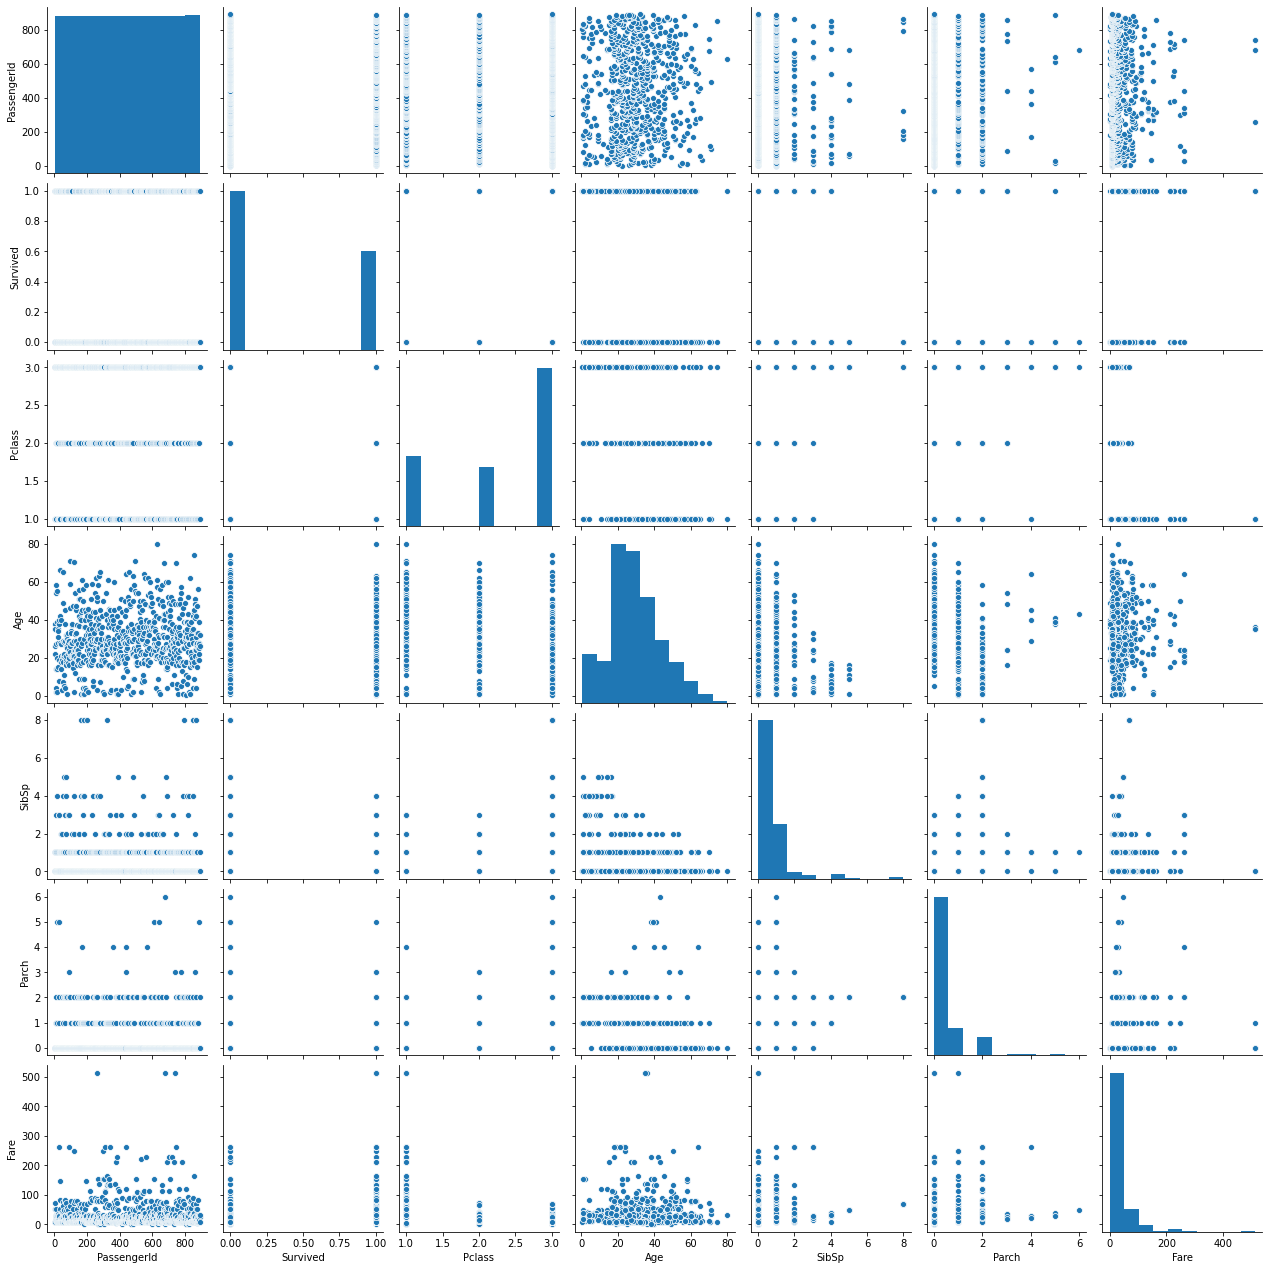

In [21]:
sns.pairplot(train_df)

Let's look at the correlation analysis

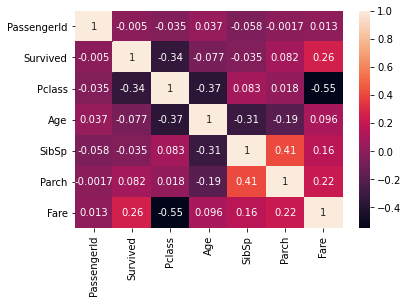

In [22]:
df_corr = train_df.corr()
sns.heatmap(df_corr,annot = True)

Numbers here represent the correlation coefficient.If the coefficient is close to 1, there is a strong positive relationship, and if it is close to -1, there is a strong negative relationship.

Outlier detection.
I will use the boxplot graph to determine the outlier.

In [23]:
def outlier(variable):
    
    sns.boxplot(train_df[variable])
    plt.show()

In [24]:
list_outlier = ["Pclass", "Age", "SibSp", "Parch", "Fare"]

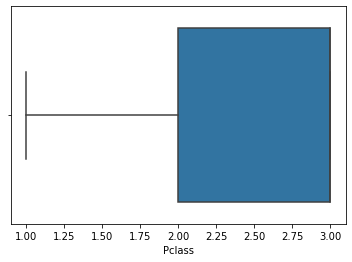

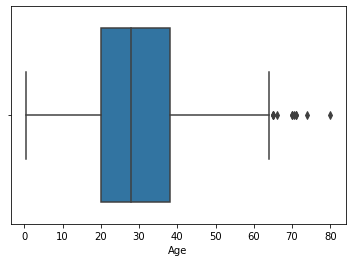

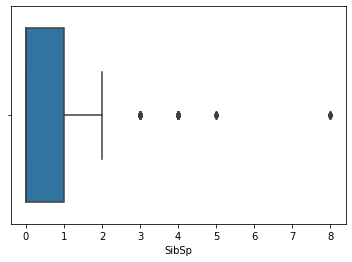

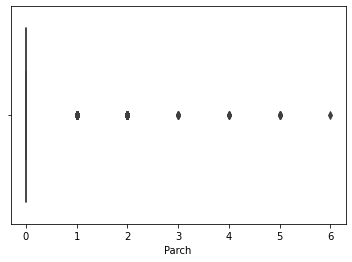

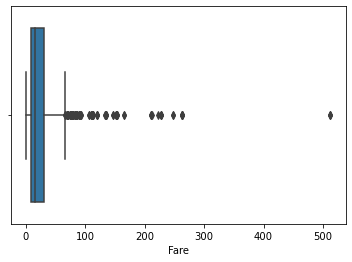

In [25]:
for i in list_outlier:
    outlier(i)

Age, Sibsp, and Fare variables have outlier values.

In [26]:
Q1 = train_df["Age"].quantile(0.25)
Q3 = train_df["Age"].quantile(0.75)

IQR = Q3 - Q1
    
lower_bound = Q1 - IQR*1.5
upper_bound = Q3 + IQR*1.5
    
total_filter = ((train_df["Age"] < lower_bound) | (train_df["Age"]>upper_bound))
outliers = train_df["Age"][total_filter]

In [27]:
list(outliers.index)

[33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851]

In [28]:
train_df.loc[outliers.index]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S


Let's delete the outlier values

In [29]:
clean_train_df = train_df[~((train_df["Age"] < lower_bound) | (train_df["Age"]>upper_bound))] 

In [30]:
clean_train_df.shape

(880, 12)

We deleted 11 observations. Now let's do the same operations to other variables

In [31]:
Q1 = train_df["SibSp"].quantile(0.25)
Q3 = train_df["SibSp"].quantile(0.75)

IQR = Q3 - Q1
    
lower_bound = Q1 - IQR*1.5
upper_bound = Q3 + IQR*1.5
    
total_filter = ((train_df["SibSp"] < lower_bound) | (train_df["SibSp"]>upper_bound))
outliers = train_df["SibSp"][total_filter]

In [32]:
list(outliers.index)

[7,
 16,
 24,
 27,
 50,
 59,
 63,
 68,
 71,
 85,
 88,
 119,
 159,
 164,
 171,
 176,
 180,
 182,
 201,
 229,
 233,
 261,
 266,
 278,
 324,
 341,
 374,
 386,
 409,
 480,
 485,
 541,
 542,
 634,
 642,
 683,
 686,
 726,
 787,
 792,
 813,
 819,
 824,
 846,
 850,
 863]

In [33]:
clean_train_df = train_df[~((train_df["SibSp"] < lower_bound) | (train_df["SibSp"]>upper_bound))] 

In [34]:
clean_train_df.shape

(845, 12)

In [35]:
Q1 = train_df["Fare"].quantile(0.25)
Q3 = train_df["Fare"].quantile(0.75)

IQR = Q3 - Q1
    
lower_bound = Q1 - IQR*1.5
upper_bound = Q3 + IQR*1.5
    
total_filter = ((train_df["Fare"] < lower_bound) | (train_df["Fare"]>upper_bound))
outliers = train_df["Fare"][total_filter]

In [36]:
list(outliers.index)

[1,
 27,
 31,
 34,
 52,
 61,
 62,
 72,
 88,
 102,
 118,
 120,
 124,
 139,
 151,
 159,
 180,
 195,
 201,
 215,
 218,
 224,
 230,
 245,
 256,
 257,
 258,
 262,
 268,
 269,
 275,
 290,
 291,
 297,
 299,
 305,
 306,
 307,
 310,
 311,
 318,
 319,
 324,
 325,
 332,
 334,
 336,
 337,
 341,
 366,
 369,
 373,
 375,
 377,
 380,
 385,
 390,
 393,
 412,
 435,
 438,
 445,
 453,
 484,
 486,
 496,
 498,
 504,
 505,
 520,
 527,
 537,
 540,
 544,
 550,
 557,
 558,
 581,
 585,
 587,
 591,
 609,
 627,
 641,
 645,
 655,
 659,
 660,
 665,
 679,
 681,
 689,
 698,
 700,
 708,
 716,
 730,
 737,
 741,
 742,
 745,
 759,
 763,
 765,
 779,
 789,
 792,
 802,
 820,
 829,
 835,
 846,
 849,
 856,
 863,
 879]

In [37]:
clean_train_df = train_df[~((train_df["Fare"] < lower_bound) | (train_df["Fare"]>upper_bound))] 

In [38]:
clean_train_df.shape

(775, 12)

In [39]:
train_df = clean_train_df

Missing values

In [40]:
total_df = pd.concat([train_df, test_df], axis = 0).reset_index(drop = True)

In [41]:
total_df.isnull().any()

PassengerId    False
Survived        True
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [42]:
total_df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            248
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          988
Embarked         0
dtype: int64

In [43]:
total_df.groupby(["Pclass", "Sex", "Embarked"])["Fare"].mean()

Pclass  Sex     Embarked
1       female  C           103.352742
                Q            90.000000
                S            78.514918
        male    C            70.058088
                S            40.263645
2       female  C            27.003791
                Q            12.350000
                S            23.023118
        male    C            20.904406
                Q            11.489160
                S            18.218229
3       female  C            13.834545
                Q             9.791968
                S            16.858467
        male    C             9.775901
                Q            10.979167
                S            12.521002
Name: Fare, dtype: float64

In [44]:
total_df[total_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
927,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [45]:
total_df["Fare"].fillna(12.521002, inplace =True)

In [46]:
list_fill = list(total_df[total_df["Age"].isnull()].index)

We converted it to list format

In [47]:
for i in list_fill:
    
    filling_age = total_df[(total_df["SibSp"] == total_df["SibSp"].iloc[i]) & 
               (total_df["Parch"] == total_df["Parch"].iloc[i])&
               (total_df["Pclass"] == total_df["Pclass"].iloc[i])]["Age"].median()
    
    age_med = total_df["Age"].median()
    
    if not np.isnan(filling_age):
        
        total_df["Age"].iloc[i] = filling_age
        
    else:
        
        total_df["Age"].iloc[i] = age_med

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

When we look at the correlation analysis here, we took the ones with the strongest relationship with age variable to filter